In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('main.csv')
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.dtypes)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)).sum())
df.rename(columns={'cpu_usage_percentage': 'CPU Usage %', 'rx_bytes': 'RX Bytes', 'rx_packets': 'RX Packets', 'tx_bytes': 'TX Bytes', 'tx_packets': 'TX Packets', 'rd_req': 'Read Requests', 'rd_bytes': 'Read Bytes', 'wr_req': 'Write Requests', 'wr_bytes': 'Write Bytes'}, inplace=True)
df.to_csv('preprocessedData.csv', index=False)



cpu_usage_percentage    0
rx_bytes                0
rx_packets              0
tx_bytes                0
tx_packets              0
rd_req                  0
rd_bytes                0
wr_req                  0
wr_bytes                0
dtype: int64
0
cpu_usage_percentage    float64
rx_bytes                  int64
rx_packets                int64
tx_bytes                  int64
tx_packets                int64
rd_req                    int64
rd_bytes                  int64
wr_req                    int64
wr_bytes                  int64
dtype: object
      cpu_usage_percentage  rx_bytes  rx_packets  tx_bytes  tx_packets  \
0                    False     False        True     False       False   
1                    False     False        True     False       False   
2                    False     False        True     False       False   
3                    False     False        True     False       False   
4                    False     False        True     False       False   
...  

PermissionError: [Errno 13] Permission denied: 'preprocessedData.csv'

In [20]:
import pandas as pd

df = pd.read_csv('preprocessedData.csv')
df2 = df[['CPU Usage %', 'RX Bytes', 'RX Packets', 'TX Bytes', 'TX Packets', 'Read Requests', 'Read Bytes', 'Write Requests', 'Write Bytes']].describe()
print(df2)

       CPU Usage %      RX Bytes     RX Packets      TX Bytes    TX Packets  \
count  2180.000000  2.180000e+03    2180.000000  2.180000e+03   2180.000000   
mean     26.179906  2.192051e+07   22769.164679  2.164516e+07  17511.898165   
std      25.074840  3.444564e+07   26755.095492  3.460052e+07  22260.156662   
min       0.080196  0.000000e+00       0.000000  0.000000e+00      0.000000   
25%       0.745498  5.200000e+01       1.000000  0.000000e+00      0.000000   
50%      35.710060  7.615350e+05    7771.000000  2.115000e+04      8.000000   
75%      44.162084  6.232830e+07   45765.000000  6.230338e+07  41827.500000   
max      97.484277  1.033056e+08  146885.000000  1.033726e+08  79719.000000   

       Read Requests    Read Bytes  Write Requests  Write Bytes  
count    2180.000000  2.180000e+03          2180.0       2180.0  
mean        0.067890  2.461503e+03             0.0          0.0  
std         1.365334  5.134878e+04             0.0          0.0  
min         0.000000  0.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# convert the target variable into categorical data
df['CPU Usage Category'] = pd.cut(df['CPU Usage %'], bins=[0, 20, 40, 60, 80, 100], labels=['very low', 'low', 'moderate', 'high', 'very high'])

# assuming 'target' is the target variable
X = df.drop(['CPU Usage %', 'CPU Usage Category'], axis = 1)
y = df['CPU Usage Category']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Accuracy:", lr_score)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Accuracy:", rf_score)



Logistic Regression Accuracy: 0.5779816513761468
Random Forest Accuracy: 0.8318042813455657


C:\Users\91889\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Load the data
df = pd.read_csv('preprocessedData.csv')

# convert the target variable into categorical data
df['CPU Usage Category'] = pd.cut(df['CPU Usage %'], bins=[0, 20, 40, 60, 80, 100], labels=['very low', 'low', 'moderate', 'high', 'very high'])

# assuming 'target' is the target variable
X = df.drop(['CPU Usage %', 'CPU Usage Category'], axis=1)
y = df['CPU Usage Category']

# convert categorical values to numerical values
mapping = {'very low': 0, 'low': 1, 'moderate': 2, 'high': 3, 'very high': 4}
y = y.map(mapping)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Make predictions using the SVM model
svm_preds = svm.predict_proba(X_test)

# Evaluate the performance of the SVM model
svm_acc = accuracy_score(y_test, svm_preds.argmax(axis=1))
svm_cm = confusion_matrix(y_test, svm_preds.argmax(axis=1), labels=[0, 1, 2, 3, 4])
svm_prec = precision_score(y_test, svm_preds.argmax(axis=1), average='weighted')
svm_rec = recall_score(y_test, svm_preds.argmax(axis=1), average='weighted')
svm_fscore = f1_score(y_test, svm_preds.argmax(axis=1), average='weighted')
svm_roc_auc = roc_auc_score(pd.get_dummies(y_test), svm_preds, multi_class='ovo')

print(f'SVM Accuracy: {svm_acc}')
print(f'SVM Confusion Matrix:\n {svm_cm}')
print(f'SVM Precision: {svm_prec}')
print(f'SVM Recall: {svm_rec}')
print(f'SVM F-Score: {svm_fscore}')
print(f'SVM AUC-ROC: {svm_roc_auc}')



SVM Accuracy: 0.7767584097859327
SVM Confusion Matrix:
 [[302   0   1   0   0]
 [ 15   9  36   0   0]
 [ 11   3 196   0   0]
 [  1   0  76   1   0]
 [  1   0   2   0   0]]
SVM Precision: 0.8144314617307921
SVM Recall: 0.7767584097859327
SVM F-Score: 0.7096284491257173
SVM AUC-ROC: 0.8430595398995905


C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Load the data
df = pd.read_csv('preprocessedData.csv')

# convert the target variable into categorical data
df['CPU Usage Category'] = pd.cut(df['CPU Usage %'], bins=[0, 20, 40, 60, 80, 100], labels=['very low', 'low', 'moderate', 'high', 'very high'])

# assuming 'target' is the target variable
X = df.drop(['CPU Usage %', 'CPU Usage Category'], axis=1)
y = df['CPU Usage Category']

# convert categorical values to numerical values
mapping = {'very low': 0, 'low': 1, 'moderate': 2, 'high': 3, 'very high': 4}
y = y.map(mapping)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions using the KNN model
knn_preds = knn.predict_proba(X_test)

# Evaluate the performance of the KNN model
knn_acc = accuracy_score(y_test, knn_preds.argmax(axis=1))
knn_cm = confusion_matrix(y_test, knn_preds.argmax(axis=1), labels=[0, 1, 2, 3, 4])
knn_prec = precision_score(y_test, knn_preds.argmax(axis=1), average='weighted')
knn_rec = recall_score(y_test, knn_preds.argmax(axis=1), average='weighted')
knn_fscore = f1_score(y_test, knn_preds.argmax(axis=1), average='weighted')
knn_roc_auc = roc_auc_score(pd.get_dummies(y_test), knn_preds, multi_class='ovo')

print(f'KNN Accuracy: {knn_acc}')
print(f'KNN Confusion Matrix:\n {knn_cm}')
print(f'KNN Precision: {knn_prec}')
print(f'KNN Recall: {knn_rec}')
print(f'KNN F-Score: {knn_fscore}')
print(f'KNN AUC-ROC: {knn_roc_auc}')

KNN Accuracy: 0.8577981651376146
KNN Confusion Matrix:
 [[295   7   1   0   0]
 [  3  27  29   1   0]
 [  7  12 176  15   0]
 [  1   0  14  63   0]
 [  1   0   2   0   0]]
KNN Precision: 0.8487198183913377
KNN Recall: 0.8577981651376146
KNN F-Score: 0.8522040500490851
KNN AUC-ROC: 0.8325994750874315


C:\Users\91889\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\91889\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


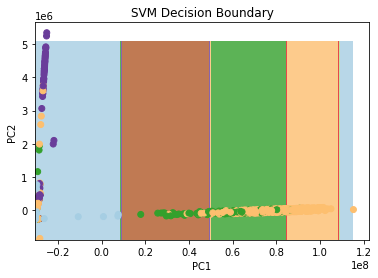

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# reduce the feature space to 2 dimensions using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# create a meshgrid for plotting the decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1000000),
                     np.arange(y_min, y_max, 1000000))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape),
                       np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape),
                       np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape),
                       np.zeros(xx.ravel().shape)])
Z = Z.reshape(xx.shape)

# plot the decision boundary and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM Decision Boundary')
plt.show()

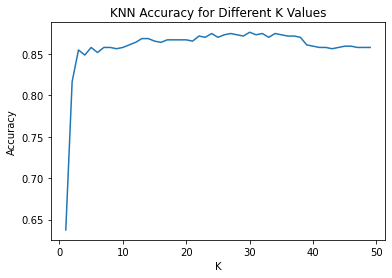

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('preprocessedData.csv')

# convert the target variable into categorical data
df['CPU Usage Category'] = pd.cut(df['CPU Usage %'], bins=[0, 20, 40, 60, 80, 100], labels=['very low', 'low', 'moderate', 'high', 'very high'])

# assuming 'target' is the target variable
X = df.drop(['CPU Usage %', 'CPU Usage Category'], axis = 1)
y = df['CPU Usage Category']

# convert categorical values to numerical values
mapping = {'very low': 0, 'low': 1, 'moderate': 2, 'high': 3, 'very high': 4}
y = y.map(mapping)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN model
k_values = list(range(1, 50))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    acc = accuracy_score(y_test, knn_preds)
    accuracy_scores.append(acc)

plt.plot(k_values, accuracy_scores)
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


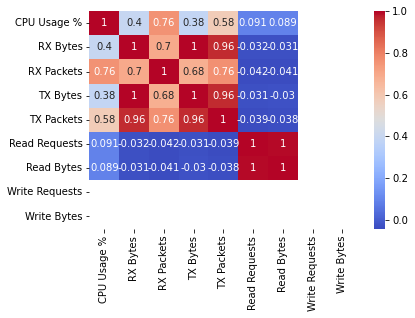

In [8]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a heatmap
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


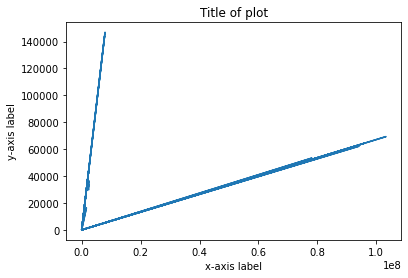

In [10]:
#Line plot
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a line plot
plt.plot(df['RX Bytes'], df['RX Packets'])
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()


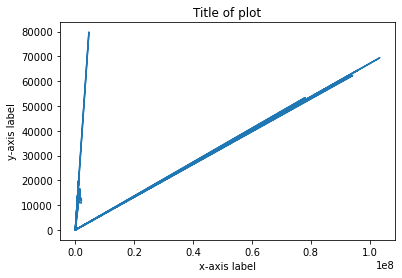

In [11]:
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a line plot
plt.plot(df['TX Bytes'], df['TX Packets'])
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()


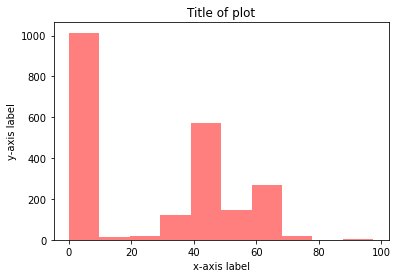

In [12]:
#Histogram 
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a histogram plot
plt.hist(df['CPU Usage %'], bins=10, alpha=0.5, color='red')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()


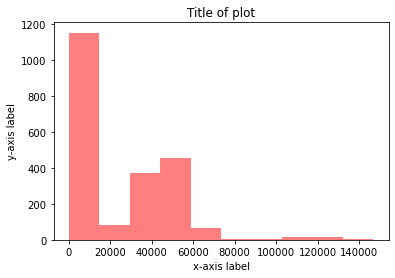

In [13]:
#Histogram 
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a histogram plot
plt.hist(df['RX Packets'], bins=10, alpha=0.5, color='red')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()


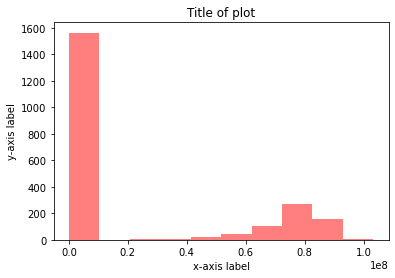

In [14]:
#Histogram 
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a histogram plot
plt.hist(df['RX Bytes'], bins=10, alpha=0.5, color='red')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()


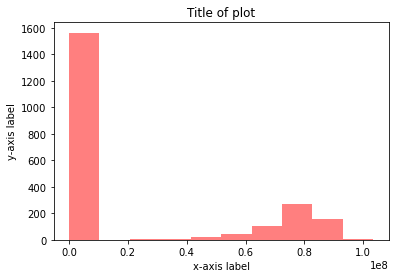

In [15]:
#Histogram 
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a histogram plot
plt.hist(df['TX Bytes'], bins=10, alpha=0.5, color='red')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()


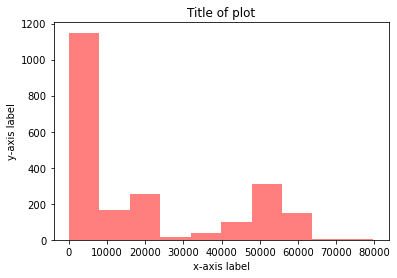

In [16]:
#Histogram 
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('preprocessedData.csv')

# Create a histogram plot
plt.hist(df['TX Packets'], bins=10, alpha=0.5, color='red')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.title('Title of plot')
plt.show()
